# Business Problem

#### Dados

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men 
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# Set up

### Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib             import pyplot as plt
from IPython.display        import HTML

from dython import nominal

### Functions

In [25]:




def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [26]:
jupyter_settings()

## ETL

### Import Data

In [27]:
df_train_raw = pd.read_csv('cardio_train.csv', sep=';')

### Data Raw status

In [28]:
df1 = df_train_raw.copy()

In [29]:
df1.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [30]:
df1.info()

# Types = ok
# Rename Columns (snakecase): ok
# Fillout NaN: ok 
# Rows:70000 
# Cols: 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Changing Data

In [31]:
# age - Change to years

df1['age'] = round(df1['age'].apply(lambda x: x / 365.25 ), 2)



# Exploratory Data Analysis

### Univariate Anaysis

In [32]:
df2 = df1.copy()

In [33]:
                         
# Número                                        'Categorias'
# AGE: Média, mediana, min, max                 gender: women,  men
# height: Média, mediana, min, max              cholesterol:  normal, above, 3: high
# weight: Média, mediana, min, max              gluc:  normal, above, high
# ap_hi: Média, mediana, min, max               smoke: yes, no
# ap_lo: Média, mediana, min, max               alco: yes, no
#                                               active: yes, no

num_attributes = df2.select_dtypes( include=['int64', 'float64'])


In [34]:
#Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply( np.median)).T

# Dispersion -std, min, max, range, skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std )).T
d2 = pd.DataFrame( num_attributes.apply( np.min )).T
d3 = pd.DataFrame( num_attributes.apply( np.max )).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew()  )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

#Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
m.columns = ['attibutes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attibutes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.00,99999.00,99999.00,49972.419900,50001.50,28851.096242,-0.001278,-1.198374
1,age,29.56,64.92,35.36,53.302869,53.94,6.754925,-0.307069,-0.823435
2,gender,1.00,2.00,1.00,1.349571,1.00,0.476835,0.630960,-1.601935
3,height,55.00,250.00,195.00,164.359229,165.00,8.210068,-0.642187,7.943653
4,weight,10.00,200.00,190.00,74.205690,72.00,14.395654,1.012070,2.586825
5,ap_hi,-150.00,16020.00,16170.00,128.817286,120.00,154.010319,85.296214,7580.074738
6,ap_lo,-70.00,11000.00,11070.00,96.630414,80.00,188.471184,32.114083,1425.914585
7,cholesterol,1.00,3.00,2.00,1.366871,1.00,0.680245,1.587123,0.993901
8,gluc,1.00,3.00,2.00,1.226457,1.00,0.572266,2.397462,4.294377
9,smoke,0.00,1.00,1.00,0.088129,0.00,0.283482,2.905867,6.444250


#### Graf num

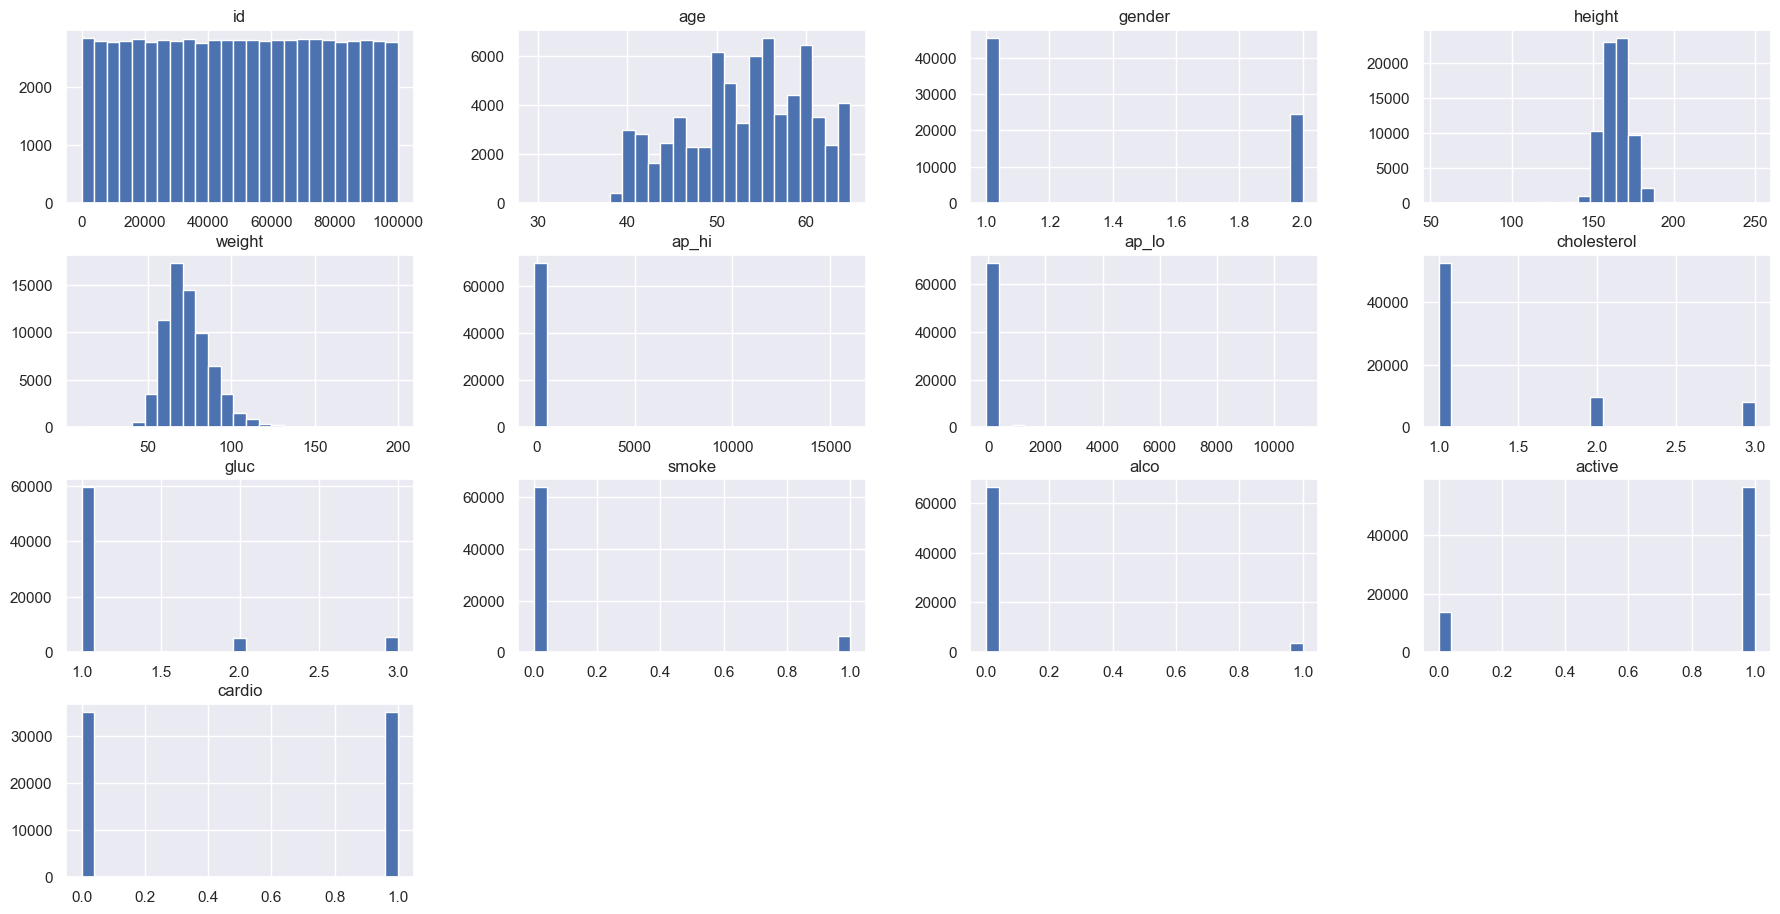

In [35]:
num_attributes.hist( bins=25, figsize=(22,11) );

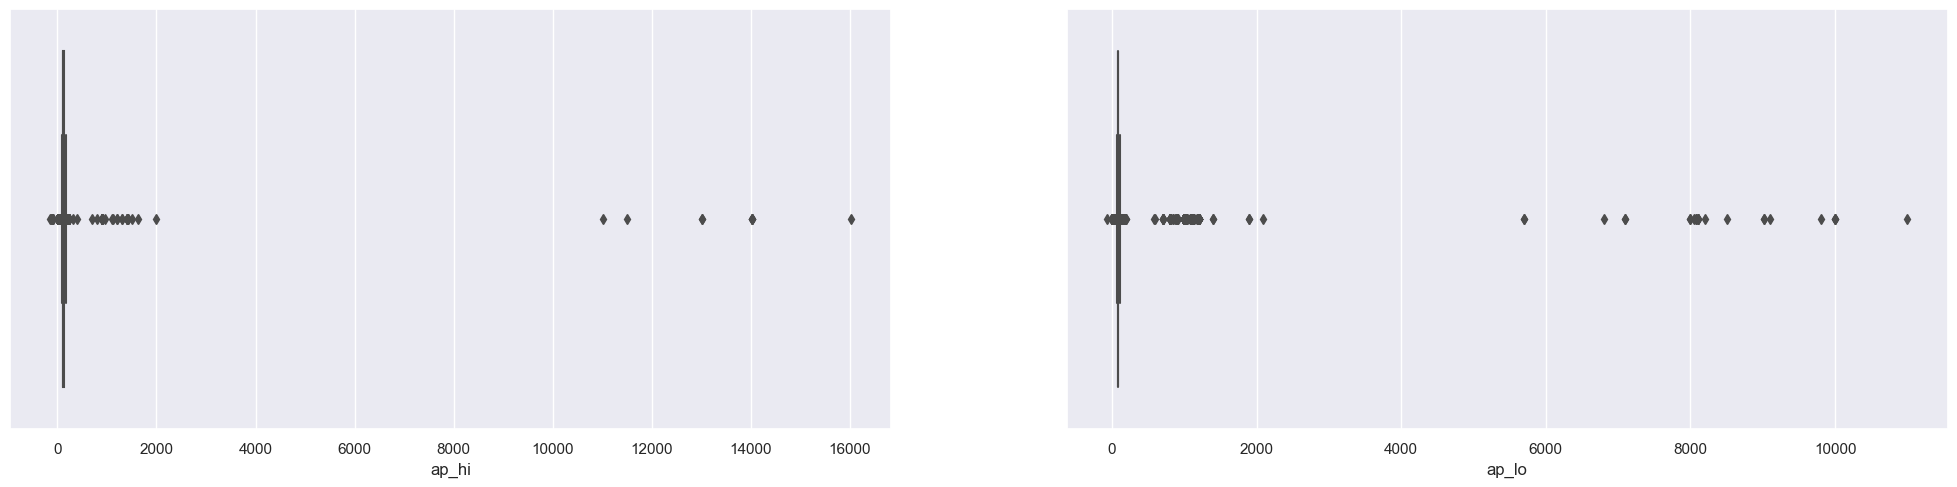

In [79]:
plt.subplot(2, 2, 1)
sns.boxplot(x='ap_hi',  data=df2);

plt.subplot(2, 2, 2)
sns.boxplot(x='ap_lo',  data=df2);

# Corrigir outliers

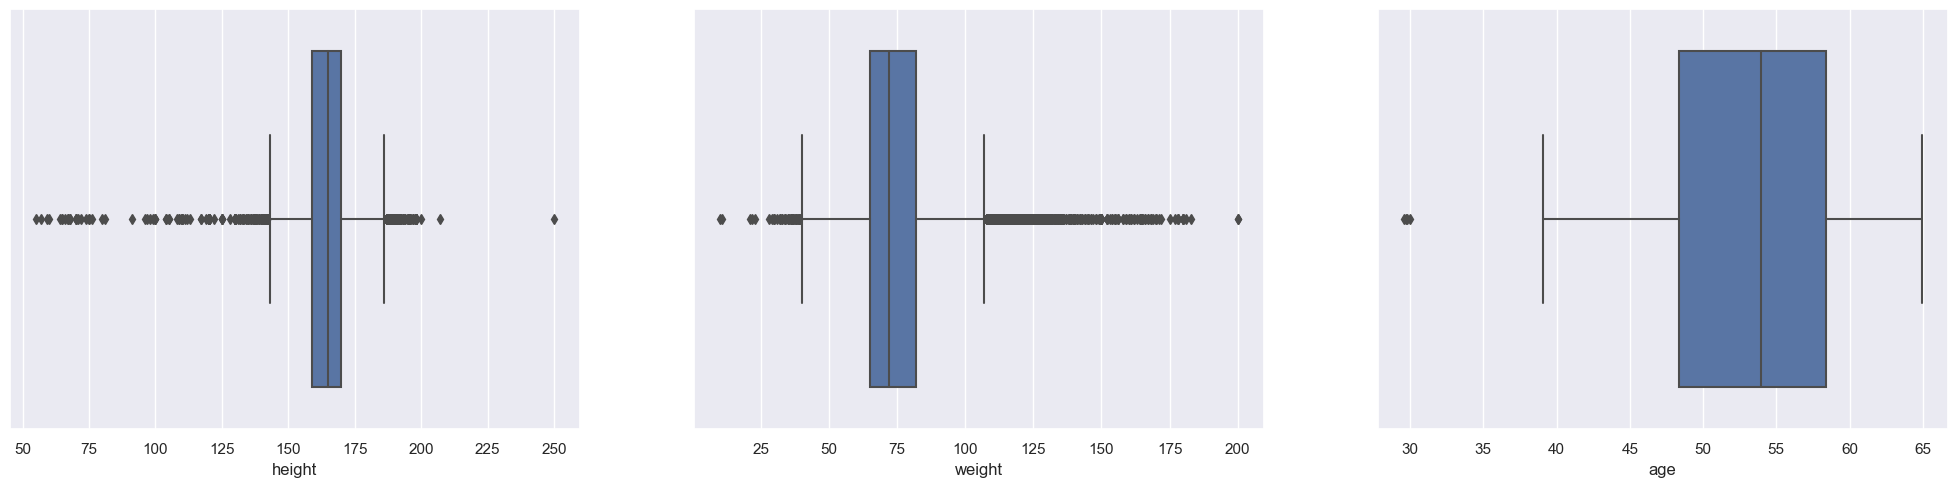

In [80]:
# cm - <130 > 200
plt.subplot(2, 3, 1)
sns.boxplot(x='height',  data=df2);

# KG - <40 > 200
plt.subplot(2, 3, 2)
sns.boxplot(x='weight',  data=df2);

plt.subplot(2, 3, 3)
sns.boxplot(x='age',  data=df2);




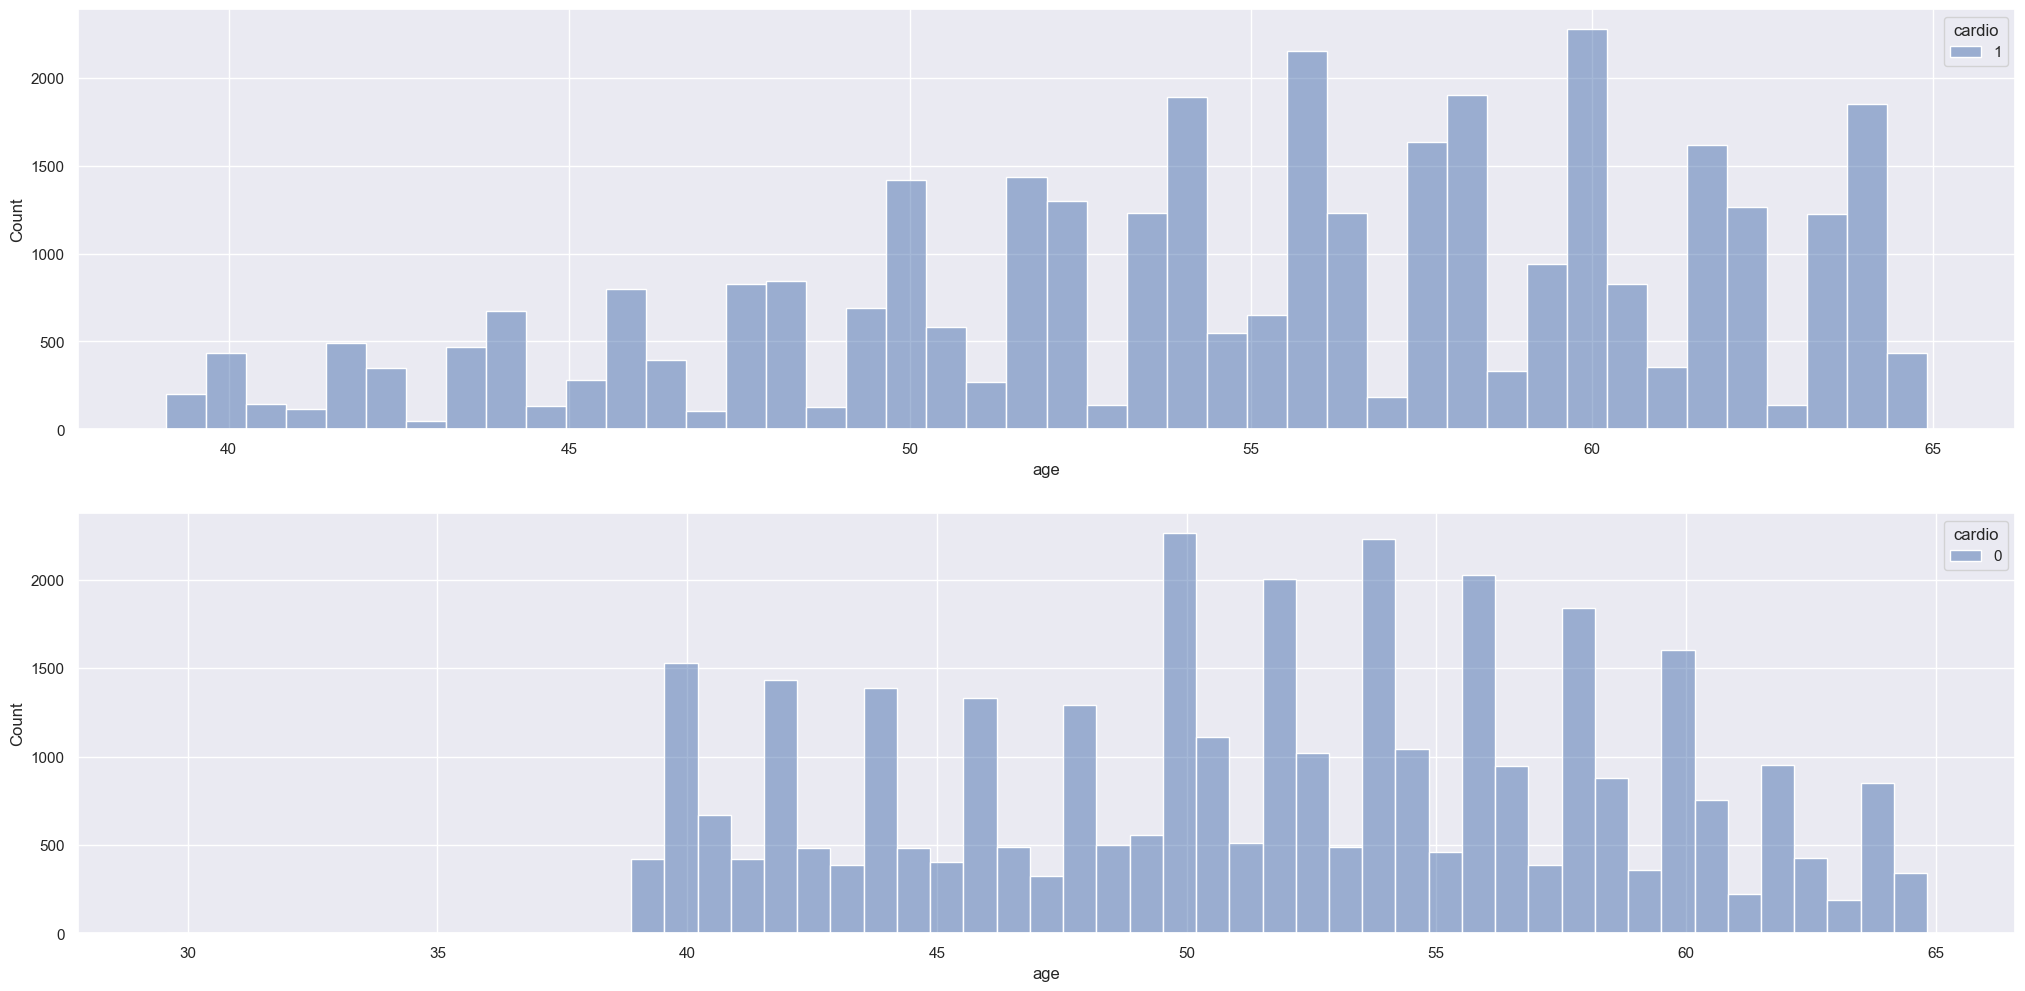

In [57]:

plt.subplot(2,1,1)
sns.histplot(x='age',
             data=df2[(df2['cardio'] == 1)],
             hue='cardio');

plt.subplot(2,1,2)
sns.histplot(x='age',
             data=df2[(df2['cardio'] == 0)],
             hue='cardio');



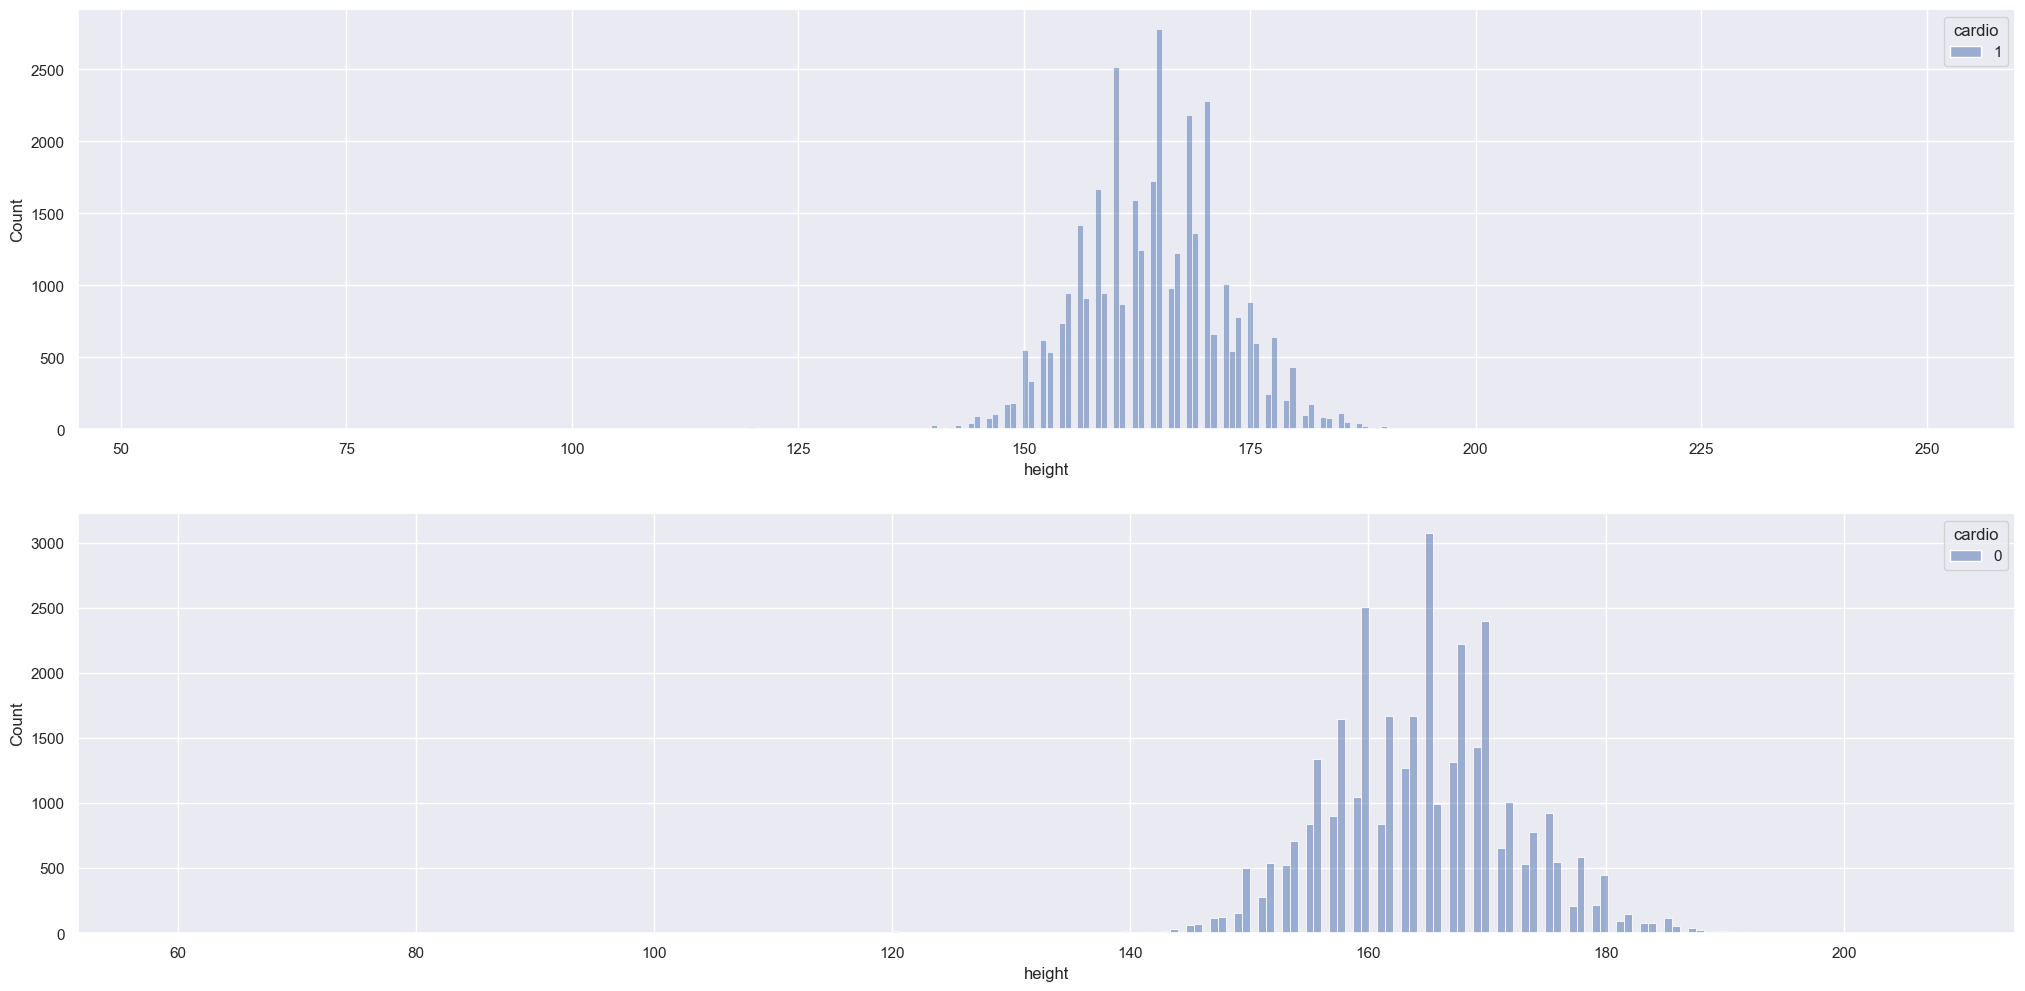

In [58]:
plt.subplot(2,1,1)
sns.histplot(x='height',
             data=df2[(df2['cardio'] == 1)],
             hue='cardio');

plt.subplot(2,1,2)
sns.histplot(x='height',
             data=df2[(df2['cardio'] == 0)],
             hue='cardio');

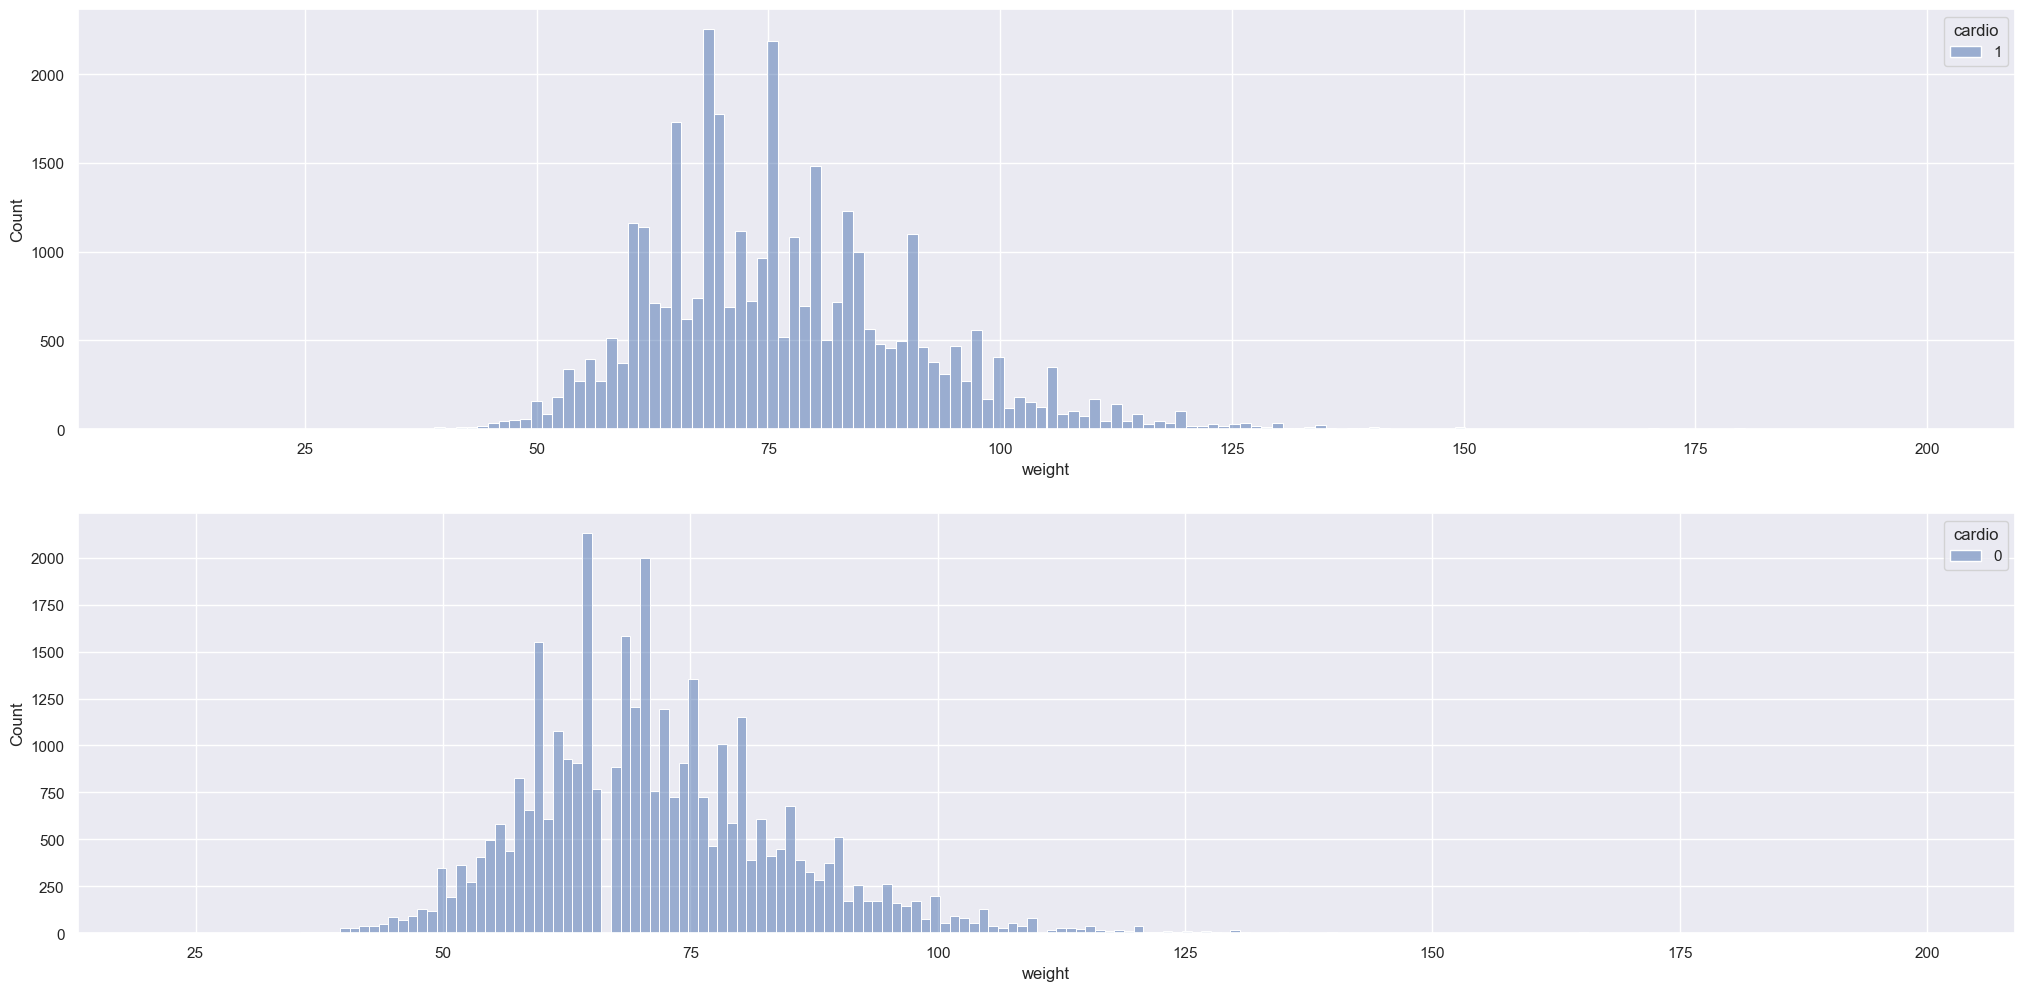

In [59]:
plt.subplot(2,1,1)
sns.histplot(x='weight',
             data=df2[(df2['cardio'] == 1)],
             hue='cardio');

plt.subplot(2,1,2)
sns.histplot(x='weight',
             data=df2[(df2['cardio'] == 0)],
             hue='cardio');




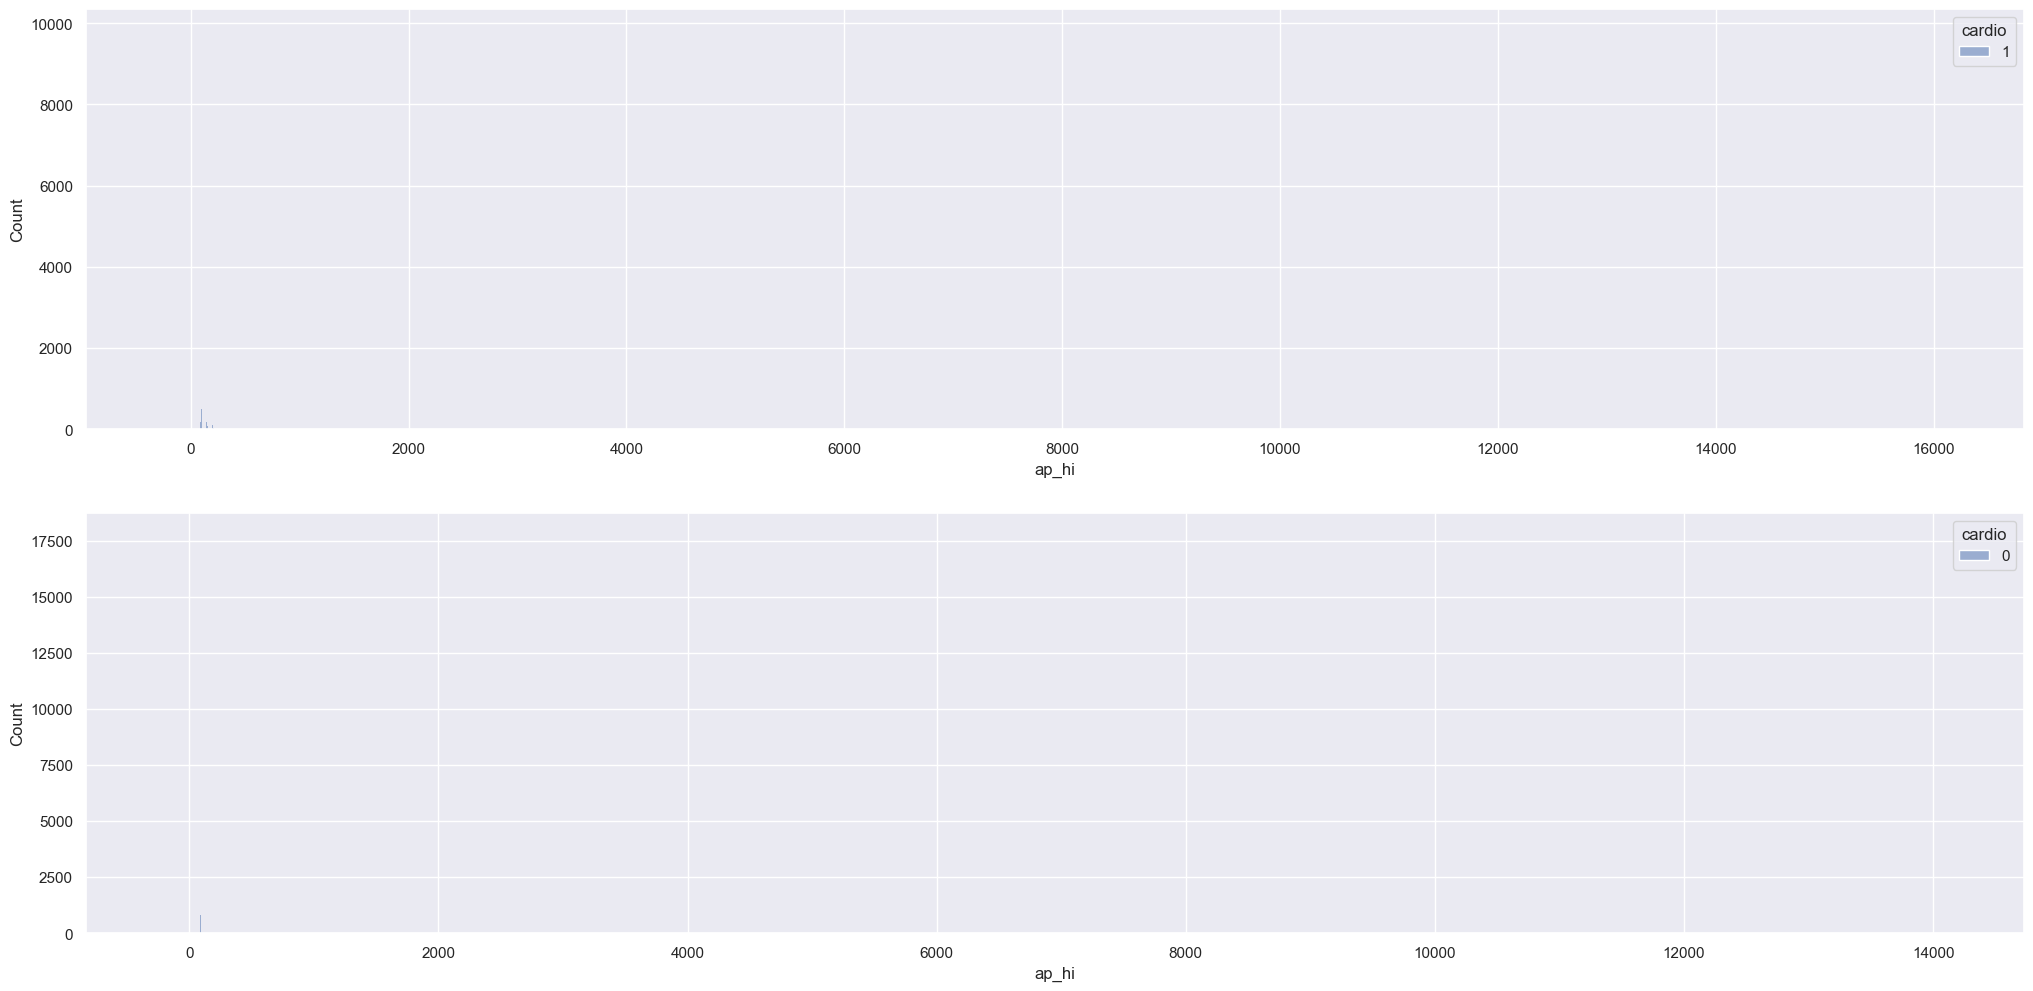

In [60]:
plt.subplot(2,1,1)
sns.histplot(x='ap_hi',
             data=df2[(df2['cardio'] == 1)],
             hue='cardio');

plt.subplot(2,1,2)
sns.histplot(x='ap_hi',
             data=df2[(df2['cardio'] == 0)],
             hue='cardio');


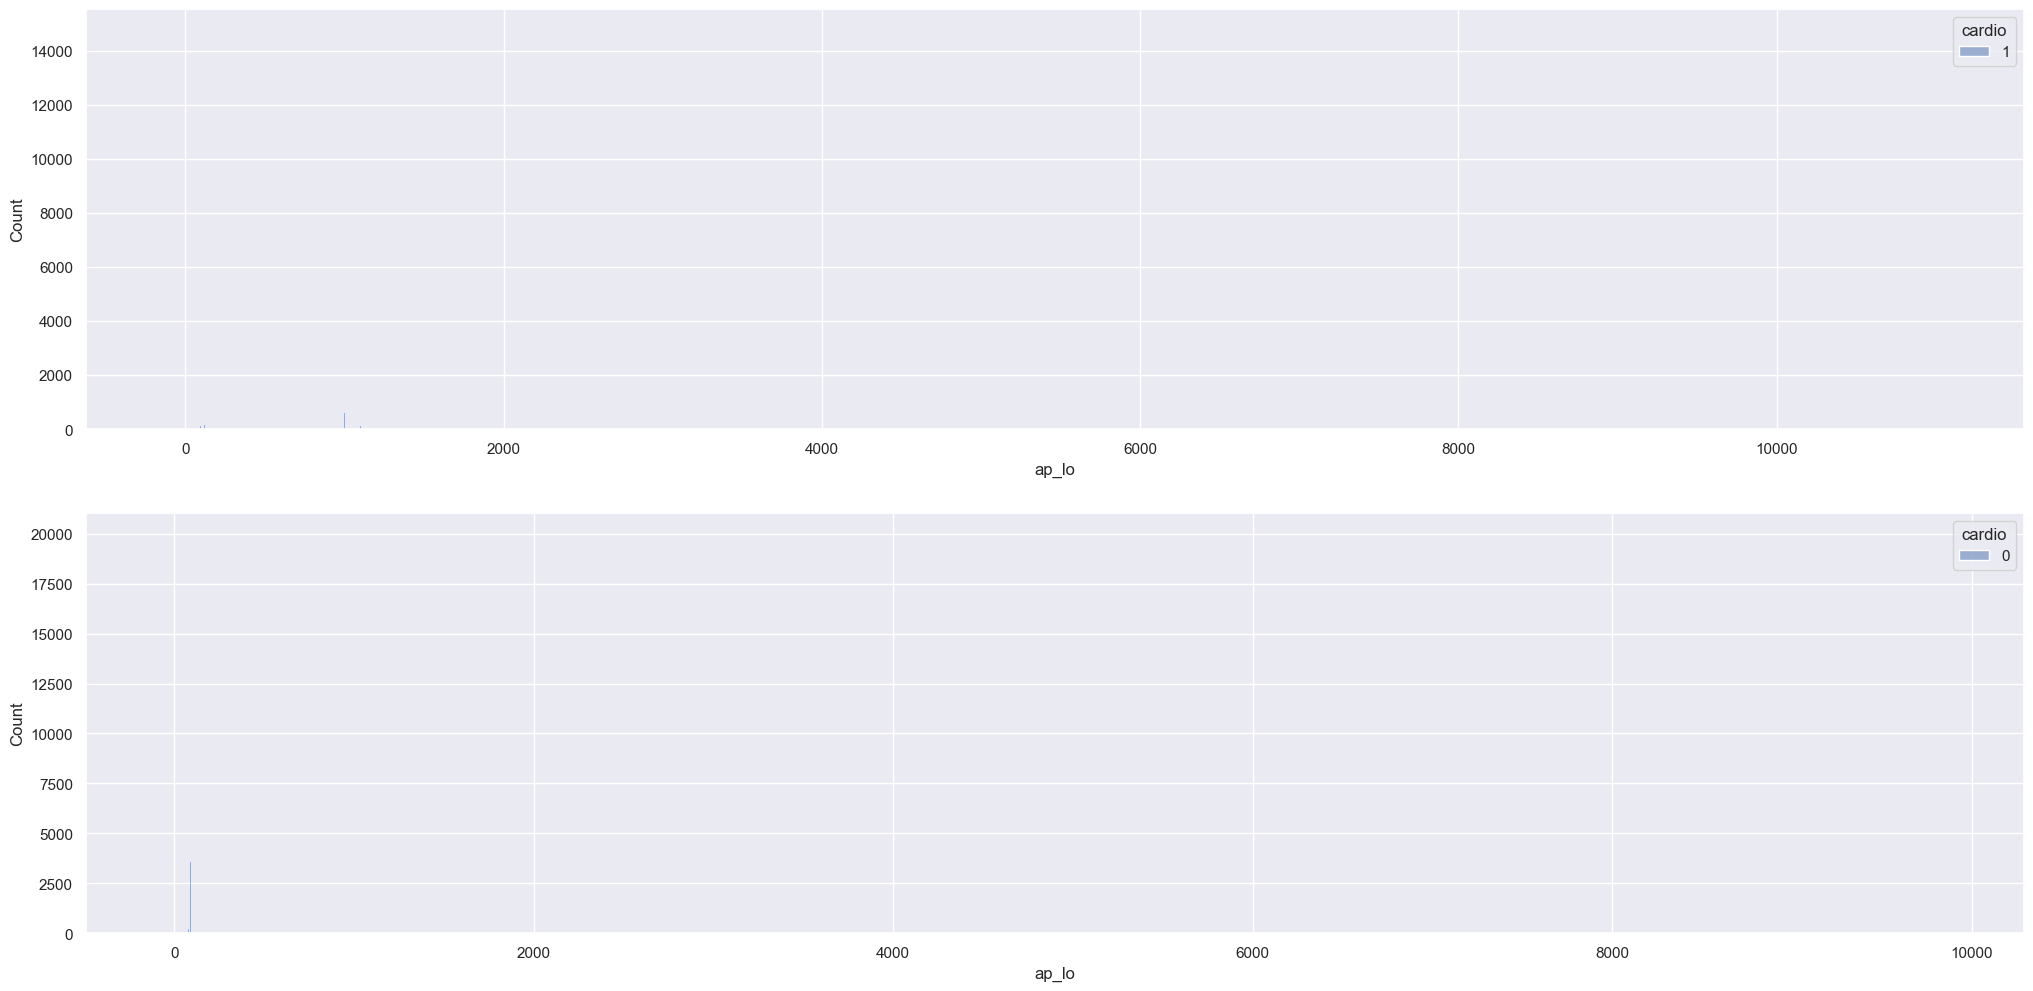

In [61]:

plt.subplot(2,1,1)
sns.histplot(x='ap_lo',
             data=df2[(df2['cardio'] == 1)],
             hue='cardio');

plt.subplot(2,1,2)
sns.histplot(x='ap_lo',
             data=df2[(df2['cardio'] == 0)],
             hue='cardio');

#### Categorical Analysis

In [36]:
# # 'Categorias'
# # gender: 1, 2 | 1 - women, 2 - men
# # cholesterol: 1, 2, 3 | 1: normal, 2: above normal, 3: well above normal
# # gluc: 1, 2, 3 | 1: normal, 2: above normal, 3: well above normal
# # smoke: 1, 0 
# # alco: 1, 0
# # active: 1, 0


# df2['gender'] = df2['gender'].apply(lambda x: 'women' if x == 1 else 'men')
# df2['smoke'] = df2['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')
# df2['alco'] = df2['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')
# df2['active'] = df2['active'].apply(lambda x: 'yes' if x == 1 else 'no')
# # df2['cardio'] = df2['cardio'].apply(lambda x: 'yes' if x == 1 else 'no')
# df2['cholesterol'] = df2['cholesterol'].map({1: 'normal', 2: 'above', 3: 'high'})
# df2['gluc'] = df2['gluc'].map({1: 'normal', 2: 'above', 3: 'high'})

In [38]:
df2.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1


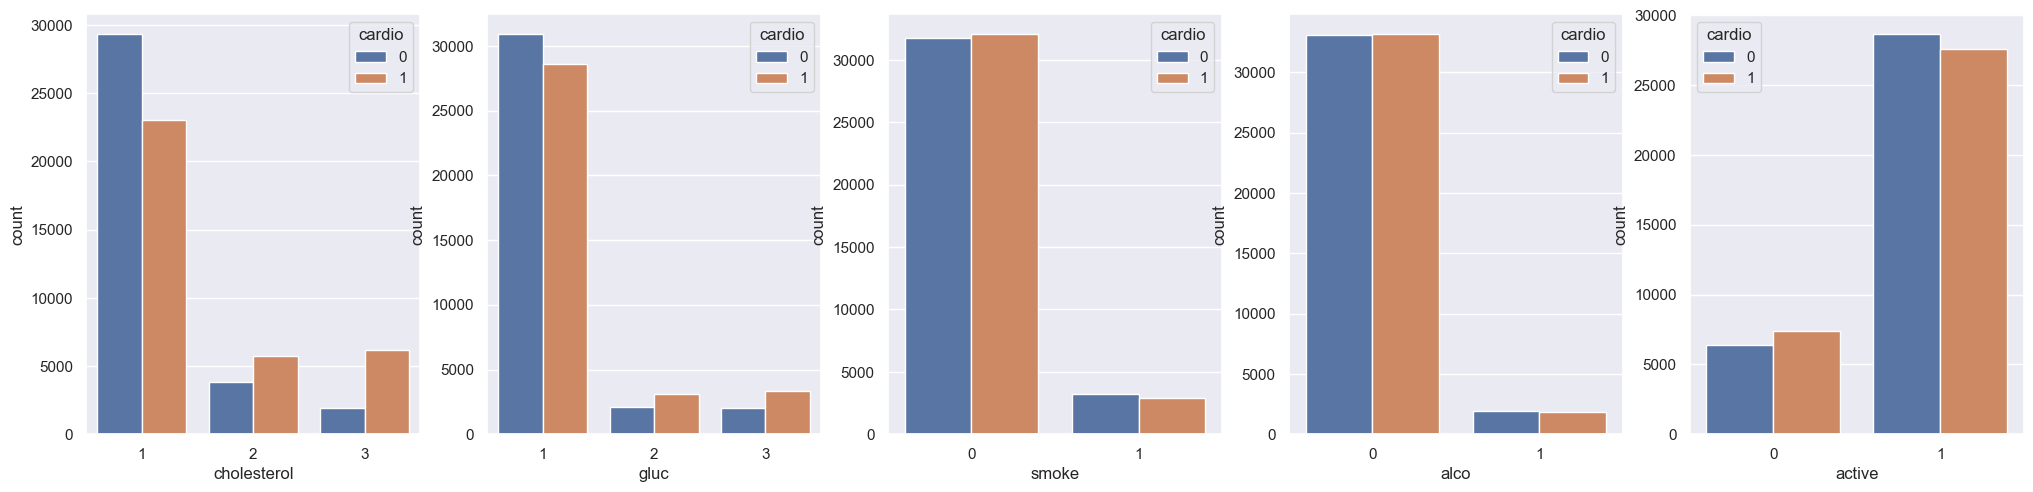

In [49]:
# Categorical analysis

# 'Categorias'
# gender: women,  men
# cholesterol:  normal, above, 3: high
# gluc:  normal, above, high
# smoke: yes, no
# alco: yes, no
# active: yes, no

plt.subplot(2,5,1)
sns.countplot(
    x='cholesterol',
    hue=('cardio'),
    data=df1,
);

plt.subplot(2,5,2)
sns.countplot(
    x='gluc',
    hue=('cardio'),
    data=df1,
);

plt.subplot(2,5,3)
sns.countplot(
     x='smoke',
    hue=('cardio'),
    data=df1,
);

plt.subplot(2,5,4)
sns.countplot(
    x='alco',
    hue=('cardio'),
    data=df1,
);

plt.subplot(2,5,5)
sns.countplot(
     x='active',
    hue=('cardio'),
    data=df2,
);

# df2['gender'] = df2['gender'].apply(lambda x: 'women' if x == 1 else 'men')
# df2['smoke'] = df2['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')
# df2['alco'] = df2['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')
# df2['active'] = df2['active'].apply(lambda x: 'yes' if x == 1 else 'no')
# # df2['cardio'] = df2['cardio'].apply(lambda x: 'yes' if x == 1 else 'no')
# df2['cholesterol'] = df2['cholesterol'].map({1: 'normal', 2: 'above', 3: 'high'})
# df2['gluc'] = df2['gluc'].map({1: 'normal', 2: 'above', 3: 'high'})

### Bivariate Analysis

##### Mental Map

#### Hyphoteses List



### Multivariate Analysis

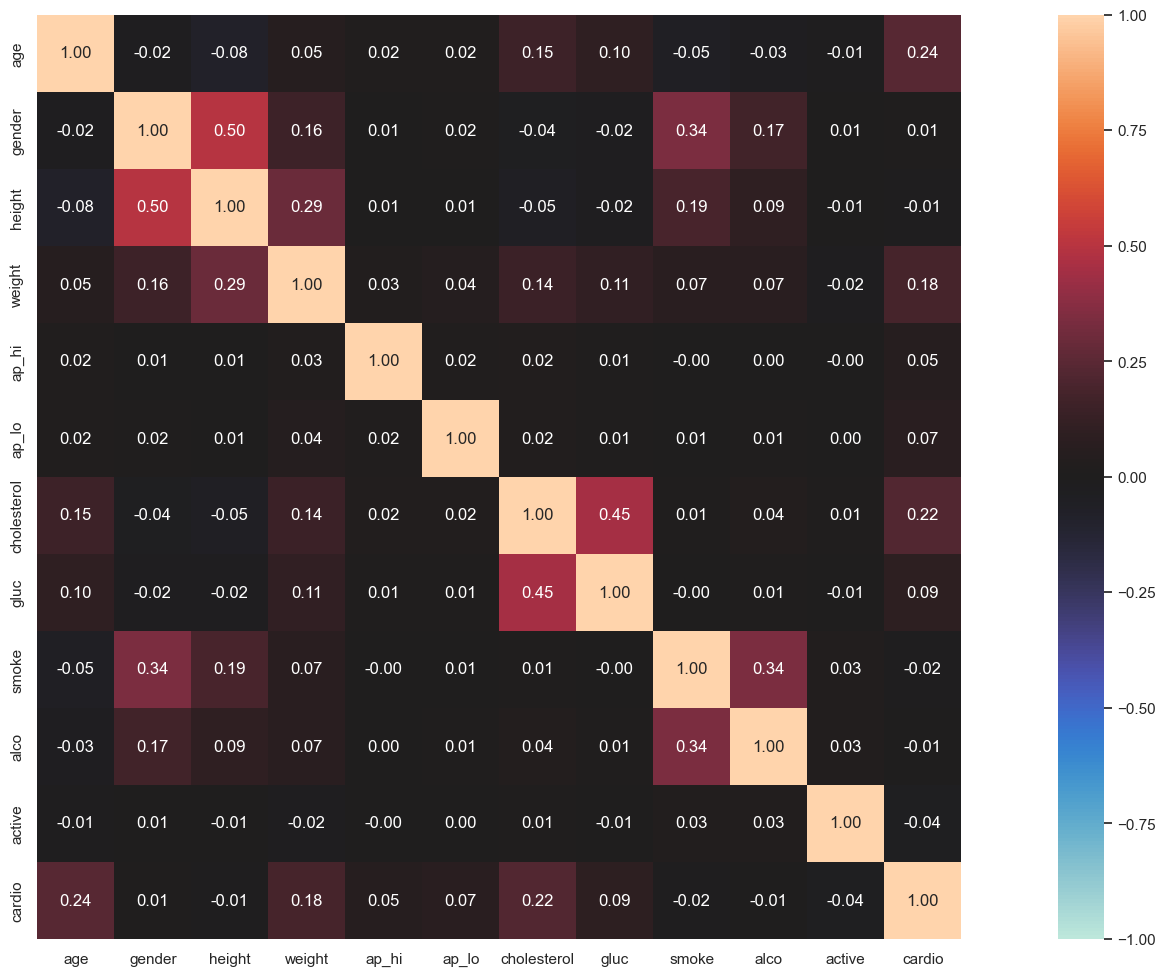

In [83]:
nominal.associations(df2.drop('id',axis = 1));

# Feature Engineering

# Data Preparation